In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
RANDOM_STATE=0

In [3]:
dat_cits = pd.read_csv("data/ml_data.csv")

# STASTICAL ANALYSIS

In [5]:
from scipy.stats import (shapiro, chi2_contingency, mannwhitneyu, kruskal, ttest_ind, spearmanr)
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.multitest import multipletests
from functions import (bootci, delta)

In [6]:
# Check normality of variables
for var in ['GM-CSF', 'IL-4', u'IL-6', u'IL-10', 'IL-17A', 'IFNg',  'TGFb', 'Dermicidina', 'AGE']:
    W, p = shapiro(dat_cits.loc[:, var].dropna())
    print(" Shapiro-wilk test W = %.3f and p = %f for variable %s" % (W, p, var))

 Shapiro-wilk test W = 0.479 and p = 0.000000 for variable GM-CSF
 Shapiro-wilk test W = 0.662 and p = 0.000000 for variable IL-4
 Shapiro-wilk test W = 0.542 and p = 0.000000 for variable IL-6
 Shapiro-wilk test W = 0.676 and p = 0.000000 for variable IL-10
 Shapiro-wilk test W = 0.691 and p = 0.000000 for variable IL-17A
 Shapiro-wilk test W = 0.826 and p = 0.000000 for variable IFNg
 Shapiro-wilk test W = 0.844 and p = 0.000000 for variable TGFb
 Shapiro-wilk test W = 0.837 and p = 0.000000 for variable Dermicidina
 Shapiro-wilk test W = 0.970 and p = 0.000003 for variable AGE


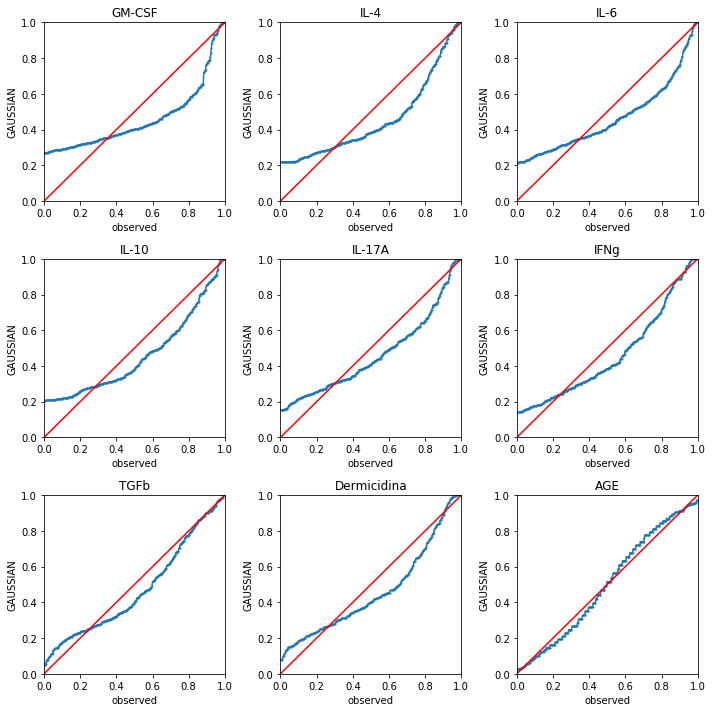

In [7]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize= (10, 10))
axs = axs.flatten()
for ii, var in enumerate(['GM-CSF', 'IL-4', u'IL-6', 
                          u'IL-10', 'IL-17A', 'IFNg',  
                          'TGFb', 'Dermicidina', 'AGE']): 
    foo=ProbPlot(data=dat_cits.loc[:,var].dropna().values.astype(float), fit=True)
    foo.ppplot(line='45', ax=axs[ii], fmt='o', linestyle = '-', markersize=1, 
               ylabel="GAUSSIAN", xlabel = "observed")
    axs[ii].set_title(var)
plt.tight_layout()

### Metastasis

In [8]:
for var in ['GM-CSF', 'IL-4', u'IL-6', u'IL-10', 'IL-17A', 'IFNg',  'TGFb', 'Dermicidina', 'AGE']:
    free = dat_cits[dat_cits.loc[:,'EVOL_METASTASIS']==0].loc[:,var].dropna().values
    met  = dat_cits[dat_cits.loc[:,'EVOL_METASTASIS']==1].loc[:,var].dropna().values
    print('median disease-free group = %.3f'
          ' and median metastasis group = %.3f' %(np.median(free), np.median(met)))

median disease-free group = 121.387 and median metastasis group = 131.550
median disease-free group = 31.960 and median metastasis group = 62.270
median disease-free group = 3.290 and median metastasis group = 4.710
median disease-free group = 11.230 and median metastasis group = 10.034
median disease-free group = 17.880 and median metastasis group = 20.092
median disease-free group = 17.230 and median metastasis group = 22.400
median disease-free group = 49.713 and median metastasis group = 48.189
median disease-free group = 4786.926 and median metastasis group = 4383.755
median disease-free group = 53.000 and median metastasis group = 60.000


In [9]:
np.random.seed(RANDOM_STATE)
for var in ['GM-CSF', 'IL-4', u'IL-6', u'IL-10', 'IL-17A', 'IFNg', 'TGFb', 'Dermicidina']:

    case = dat_cits[dat_cits['EVOL_METASTASIS']==0].loc[:,var].dropna().values
    l, u = bootci(case, stat=np.median)
    print(('median of %s in disease-free group = %.3f, 95%% CI [%.3f, %.3f]') % (var,
                                                                                   np.median(case),
                                                                                   l, u))

    case = dat_cits[dat_cits['EVOL_METASTASIS']==1].loc[:,var].dropna().values
    l, u = bootci(case, stat=np.median)
    print(('median of %s in metastasis group = %.3f, 95%% CI [%.3f, %.3f]') % (var,
                                                                                 np.median(case),
                                                                                 l, u))
    
    print(" ")

median of GM-CSF in disease-free group = 121.387, 95% CI [103.170, 138.630]
median of GM-CSF in metastasis group = 131.550, 95% CI [101.010, 153.240]
 
median of IL-4 in disease-free group = 31.960, 95% CI [27.760, 38.060]
median of IL-4 in metastasis group = 62.270, 95% CI [39.060, 92.210]
 
median of IL-6 in disease-free group = 3.290, 95% CI [2.820, 3.870]
median of IL-6 in metastasis group = 4.710, 95% CI [3.310, 5.900]
 
median of IL-10 in disease-free group = 11.230, 95% CI [7.890, 14.828]
median of IL-10 in metastasis group = 10.034, 95% CI [7.784, 15.310]
 
median of IL-17A in disease-free group = 17.880, 95% CI [16.330, 20.060]
median of IL-17A in metastasis group = 20.092, 95% CI [14.890, 24.330]
 
median of IFNg in disease-free group = 17.230, 95% CI [14.840, 19.340]
median of IFNg in metastasis group = 22.400, 95% CI [16.990, 26.910]
 
median of TGFb in disease-free group = 49.713, 95% CI [45.319, 53.680]
median of TGFb in metastasis group = 48.189, 95% CI [40.135, 60.439]


In [10]:
pvals = []
cliffs = []
for var in ['GM-CSF', 'IL-4', u'IL-6', u'IL-10', 'IL-17A', 'IFNg',  'TGFb', 'Dermicidina']:
    free = dat_cits[dat_cits.loc[:,'EVOL_METASTASIS']==0].loc[:,var].dropna().values
    met  = dat_cits[dat_cits.loc[:,'EVOL_METASTASIS']==1].loc[:,var].dropna().values
    u, p = mannwhitneyu(free, met, alternative='two-sided')
    pvals.append(p)
    N1N2=float(len(free)*len(met))
    delta = 1.0 - 2*u/N1N2
    cliffs.append(delta)

_, pvals_fdr, _, _ = multipletests(pvals, method="fdr_bh")    
for ii, var in enumerate(['GM-CSF', 'IL-4', u'IL-6', u'IL-10', 'IL-17A', 'IFNg',  'TGFb', 'Dermicidina']):
    print( '%s  FDR p-val corrected = %.3f and Cliff delta = %.3f' % (var, pvals_fdr[ii], abs(cliffs[ii])))

GM-CSF  FDR p-val corrected = 0.720 and Cliff delta = 0.028
IL-4  FDR p-val corrected = 0.001 and Cliff delta = 0.300
IL-6  FDR p-val corrected = 0.044 and Cliff delta = 0.201
IL-10  FDR p-val corrected = 0.672 and Cliff delta = 0.045
IL-17A  FDR p-val corrected = 0.672 and Cliff delta = 0.045
IFNg  FDR p-val corrected = 0.377 and Cliff delta = 0.116
TGFb  FDR p-val corrected = 0.672 and Cliff delta = 0.042
Dermicidina  FDR p-val corrected = 0.672 and Cliff delta = 0.071


In [11]:
# AGE and SEX
free_age = dat_cits[dat_cits.loc[:,'EVOL_METASTASIS']==0].loc[:,'AGE'].dropna().values
met_age = dat_cits[dat_cits.loc[:,'EVOL_METASTASIS']==1].loc[:,'AGE'].dropna().values
t, p = ttest_ind(free_age,met_age)
print('Mean age for disease group = %.3f and metastasis  = %.3f'
      ' (t = %.3f, p = %.3f)' % (np.mean(free_age), np.mean(met_age), t, p))

sex_free_counts = dat_cits[dat_cits.loc[:,'EVOL_METASTASIS']==0].loc[:,'SEX'].dropna().value_counts().values
sex_met_counts = dat_cits[dat_cits.loc[:,'EVOL_METASTASIS']==1].loc[:,'SEX'].dropna().value_counts().values
chi2, p, _,_ = chi2_contingency([sex_free_counts,
                                 sex_met_counts])

print(("Metastasis vs Sex (chi2 = %.3f and p = %.3f)") % (chi2, p))

Mean age for disease group = 54.142 and metastasis  = 58.893 (t = -2.272, p = 0.024)
Metastasis vs Sex (chi2 = 0.011 and p = 0.915)


### Age

In [12]:
# Spearman correlation with age
for var in ['GM-CSF', 'IL-4', u'IL-6', u'IL-10', 'IL-17A', 'IFNg',  'TGFb', 'Dermicidina']:
    temp_df = dat_cits.loc[:, [var, 'AGE']].dropna()
    a = temp_df.loc[:,var].values
    b = temp_df.loc[:,'AGE'].values
    r, p = spearmanr(a,b)
    print(("Sperman correlation between Age and %s r = %.3f, p = %.3f") % (var, r, p))

Sperman correlation between Age and GM-CSF r = -0.257, p = 0.000
Sperman correlation between Age and IL-4 r = -0.119, p = 0.037
Sperman correlation between Age and IL-6 r = -0.049, p = 0.390
Sperman correlation between Age and IL-10 r = -0.122, p = 0.033
Sperman correlation between Age and IL-17A r = -0.132, p = 0.022
Sperman correlation between Age and IFNg r = -0.128, p = 0.025
Sperman correlation between Age and TGFb r = -0.121, p = 0.033
Sperman correlation between Age and Dermicidina r = -0.026, p = 0.669


### Sex

In [13]:
# SEX
for var in ['GM-CSF', 'IL-4', u'IL-6', u'IL-10', 'IL-17A', 'IFNg',  'TGFb', 'Dermicidina']:
    temp_df = dat_cits.loc[:, [var, 'SEX']].dropna()
    a = temp_df[temp_df['SEX'] ==0][var].values
    b = temp_df[temp_df['SEX'] ==1][var].values
    u, p = mannwhitneyu(a, b)
    print('Male median = %.3f and Female median = %.3f between sexs for'
          ' %s (p = %.3f)' % (np.median(a), np.median(b), var, p))

Male median = 106.855 and Female median = 137.865 between sexs for GM-CSF (p = 0.005)
Male median = 29.290 and Female median = 39.700 between sexs for IL-4 (p = 0.010)
Male median = 2.895 and Female median = 4.110 between sexs for IL-6 (p = 0.010)
Male median = 9.025 and Female median = 13.136 between sexs for IL-10 (p = 0.036)
Male median = 15.925 and Female median = 19.671 between sexs for IL-17A (p = 0.025)
Male median = 14.025 and Female median = 19.760 between sexs for IFNg (p = 0.001)
Male median = 46.042 and Female median = 51.434 between sexs for TGFb (p = 0.101)
Male median = 4953.067 and Female median = 4263.560 between sexs for Dermicidina (p = 0.001)


# MACHINE LEARNING ANALYSIS

In [14]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from imblearn import pipeline

In [15]:
# Import preprocessing modules
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectFromModel

In [16]:
# Import model selection and validation modules
from sklearn.model_selection import (StratifiedKFold, cross_validate, 
                                     GridSearchCV, RepeatedStratifiedKFold)

# Import metrics modules for measuring the performance
from sklearn import metrics

In [17]:
scoring = {'acc': 'accuracy',
           'bac': 'balanced_accuracy',
           'rec': 'recall',
           'prec': 'precision',
          'roc':'roc_auc',
          'avg': 'average_precision',
          'f1w':'f1_weighted'}

clf_names = ['LogReg', 'SVM', 'Tree', 'NBayes', 'KNN']

# 3 List of classifiers and parameter grids
classifiers =  [
        (LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE), 
         {'clf__C':np.logspace(-3, 2, 10)}),
         (SVC(class_weight='balanced', random_state=RANDOM_STATE),
          {'clf__C':np.logspace(-3, 2, 10)}),
          (DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE),
           {'clf__max_leaf_nodes':np.arange(2,12)}),
           (GaussianNB(),
            {}),
             (KNeighborsClassifier(),
              {'clf__n_neighbors': np.arange(1,20,2)})
]
    
feat = SelectFromModel(LogisticRegression(C=0.1, class_weight='balanced', penalty='l2', random_state=RANDOM_STATE),
                       threshold=-np.inf)
scaler = RobustScaler()
ros = RandomOverSampler(random_state=RANDOM_STATE)

In [18]:
cyt_dcd = ['GM-CSF', 'IL-4', 'IL-6', 'IL-10', 'IL-17A', 'IFNg', 'TGFb', 'Dermicidina']

In [19]:
scores= ['train_bac', 'test_bac', 
         'train_rec', 'test_rec', 
         'train_prec', 'test_prec',
         'train_roc', 'test_roc']

## CLINICAL CLASSIFICATION (Only Breslow)

In [20]:
X_baseline = dat_cits.loc[:,'HIST_BRESLOW_mm'].values.reshape(-1,1)
y_baseline = dat_cits.loc[:,'EVOL_METASTASIS'].values

In [21]:
list_res_clinical = dict()
for clf_name, (clf, param_grid) in zip(clf_names, classifiers):
    
    pip = pipeline.Pipeline([('scaler', scaler), ('ros', ros), ('clf', clf)])
    param_grid_serum = param_grid.copy()
    
    grid = GridSearchCV(estimator=pip, 
                        param_grid=param_grid_serum, 
                        scoring='balanced_accuracy', 
                        iid=False,
                        cv= StratifiedKFold(n_splits=10, random_state=RANDOM_STATE))

    res_cv = cross_validate(grid, X_baseline, y_baseline, 
                         scoring=scoring, 
                         cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=RANDOM_STATE),
                         return_estimator=True,
                         return_train_score=True,
                         verbose=1,
                         n_jobs=6)
    
    list_res_clinical[clf_name] = res_cv

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   11.4s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   14.7s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   18.8s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    9.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:    1.3s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   12.7s finished


In [22]:
res_df = pd.DataFrame({})
for name, estim in list_res_clinical.items():
    res_df[name] = pd.DataFrame(estim).loc[:, scores].mean()
                                                                    
res_df

,LogReg,SVM,Tree,NBayes,KNN
train_bac,0.749188,0.740251,0.779294,0.726583,0.786886
test_bac,0.730167,0.735706,0.725611,0.725550,0.732606
train_rec,0.726526,0.656481,0.768091,0.547607,0.803182
test_rec,0.695000,0.649444,0.690556,0.546667,0.729444
train_prec,0.529778,0.563737,0.570666,0.666506,0.549913
test_prec,0.516929,0.584004,0.535002,0.691692,0.496681
train_roc,0.834462,0.822780,0.840743,0.830751,0.876466
test_roc,0.837185,0.815058,0.787187,0.832778,0.791731


In [23]:
f = open("results/res_breslow_dict.pkl", "wb")
pickle.dump(list_res_clinical, f)
f.close()

## SERUM CLASSIFICATION

In [24]:
X_cits = dat_cits.loc[:, ['EVOL_METASTASIS'] +  cyt_dcd].dropna().loc[:, cyt_dcd].values
y_cits = dat_cits.loc[:, ['EVOL_METASTASIS'] +  cyt_dcd].dropna().loc[:, 'EVOL_METASTASIS'].values

In [25]:
list_res_serum = dict()
for clf_name, (clf, param_grid) in zip(clf_names, classifiers):
    
    pip = pipeline.Pipeline([('scaler', scaler), ('ros', ros), ('feat', feat), ('clf', clf)])
    param_grid_serum = param_grid.copy()

    param_grid_serum['feat__max_features'] = range(1, X_cits.shape[1] + 1)
    
    grid = GridSearchCV(estimator=pip, param_grid=param_grid_serum, scoring='balanced_accuracy', iid=False,
                        cv= StratifiedKFold(n_splits=10, random_state=RANDOM_STATE))

    res_cv = cross_validate(grid, X_cits, y_cits, 
                         scoring=scoring, 
                         cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=RANDOM_STATE),
                         return_estimator=True,
                         return_train_score=True,
                         verbose=1,
                         n_jobs=6)
    
    list_res_serum[clf_name] = res_cv

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:  2.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:  3.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:  2.2min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    8.6s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   11.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done  50 out of  5

In [26]:
res_df = pd.DataFrame({})
for name, estim in list_res_serum.items():
    res_df[name] = pd.DataFrame(estim).loc[:, scores].mean()
                                                                    
res_df

,LogReg,SVM,Tree,NBayes,KNN
train_bac,0.657485,0.690426,0.735731,0.606189,0.722054
test_bac,0.599792,0.581913,0.577931,0.555203,0.567844
train_rec,0.626925,0.537780,0.708839,0.430055,0.749647
test_rec,0.527333,0.354000,0.477333,0.354000,0.520667
train_prec,0.350344,0.479563,0.465760,0.455982,0.396820
test_prec,0.298257,0.332845,0.301155,0.314379,0.267980
train_roc,0.719791,0.752545,0.787368,0.658982,0.796883
test_roc,0.654242,0.629765,0.583815,0.585032,0.584555


In [27]:
f = open("results/res_serum_dict.pkl", "wb")
pickle.dump(list_res_serum, f)
f.close()

## BRESLOW + SERUM CLASSIFICATION

In [28]:
X_all = dat_cits.dropna().loc[:, ['HIST_BRESLOW_mm'] + cyt_dcd].values
y_all = dat_cits.dropna().loc[:,'EVOL_METASTASIS'].values

In [29]:
print("The size of this matrix is = ", X_all.shape)

The size of this matrix is =  (267, 9)


In [30]:
res_all_dict = dict()
for clf_name, (clf, param_grid) in zip(clf_names, classifiers):
    
    pip = pipeline.Pipeline([('scaler', scaler), ('ros', ros), ('feat', feat), ('clf', clf)])    
    
    param_grid_all = param_grid.copy()
    param_grid_all['feat__max_features'] = range(1, X_all.shape[1] + 1)
    
    grid = GridSearchCV(estimator=pip, param_grid = param_grid_all, 
                        scoring='balanced_accuracy', iid=False,
                        cv= StratifiedKFold(n_splits=10, random_state=RANDOM_STATE))

    res_cv = cross_validate(grid, X_all, y_all, 
                         scoring=scoring, 
                         cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=RANDOM_STATE),
                         return_estimator=True,
                         return_train_score=True,
                         verbose=1,
                         n_jobs=6)
    
    res_all_dict[clf_name] = res_cv

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:  3.3min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:  2.4min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   11.3s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   14.1s finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done  50 out of  5

In [32]:
res_df = pd.DataFrame({})
for name, estim in res_all_dict.items():
    res_df[name] = pd.DataFrame(estim).loc[:, scores].mean()
                                                                    
res_df

,LogReg,SVM,Tree,NBayes,KNN
train_bac,0.823814,0.801495,0.865363,0.797285,0.850183
test_bac,0.803706,0.775597,0.760277,0.777926,0.745160
train_rec,0.794125,0.731788,0.879027,0.690933,0.862557
test_rec,0.775333,0.686000,0.708000,0.662000,0.707333
train_prec,0.593963,0.604365,0.626551,0.656769,0.588830
test_prec,0.573773,0.600193,0.538696,0.634567,0.469746
train_roc,0.909471,0.879378,0.926753,0.884525,0.926597
test_roc,0.892224,0.859915,0.854579,0.856176,0.819926


In [33]:
f = open("results/res_all_dict.pkl", "wb")
pickle.dump(res_all_dict, f)
f.close()

#### Is there a significant improve between breslow and combination?

In [35]:
from scipy.stats import wilcoxon, ttest_rel
print(wilcoxon(list_res_clinical['LogReg']['test_bac'], res_all_dict['LogReg']['test_bac']))

WilcoxonResult(statistic=346.0, pvalue=0.004893727738598007)


One of the reviewers asked to include the classification of DCD, IL-4 and GM-CSF, since they are the serum variables that contribute most to classification along with Breslow. Here is the result for LogisticRegression:

In [36]:
X_cits_sub = dat_cits.loc[:, ['EVOL_METASTASIS'] +  cyt_dcd].dropna().loc[:, ['GM-CSF', 
                                                                              'IL-4', 
                                                                              'Dermicidina']].values
y_cits_sub = dat_cits.loc[:, ['EVOL_METASTASIS'] +  cyt_dcd].dropna().loc[:, 'EVOL_METASTASIS'].values

# We don't want know the feature selection, since, we are going to use the three of them together
clf = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)        
pip = pipeline.Pipeline([('scaler', scaler), ('ros', ros), ('clf', clf)])
grid = GridSearchCV(estimator=pip, 
                    param_grid={'clf__C':np.logspace(-3, 2, 10)}, 
                    scoring='balanced_accuracy', 
                    iid=False,
                    cv= StratifiedKFold(n_splits=10, random_state=RANDOM_STATE))

res_cv = cross_validate(grid, X_cits_sub, y_cits_sub, 
                         scoring=scoring, 
                         cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=RANDOM_STATE),
                         return_estimator=True,
                         return_train_score=True,
                         verbose=1,
                         n_jobs=6)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   10.3s
[Parallel(n_jobs=6)]: Done  50 out of  50 | elapsed:   12.5s finished


In [37]:
print("acc=%.4f, rec = %.4f, prec = %.4f, roc= %.4f " % (pd.DataFrame(res_cv)['test_bac'].mean(),
                                               pd.DataFrame(res_cv)['test_rec'].mean(),
                                               pd.DataFrame(res_cv)['test_prec'].mean(),
                                             pd.DataFrame(res_cv)['test_roc'].mean()))

acc=0.5982, rec = 0.5647, prec = 0.2920, roc= 0.6697 
